In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#the global Image Path
img_path='/content/drive/MyDrive/SM_Interaction/LMP/computer_vision/Computer_Vision_data/'

#### Loading the dataset
Yale faces database : http://vision.ucsd.edu/content/yale-face-database

In [3]:
#with connect the image database
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [4]:
##import the dataset, unzip and stored in the yalefaces folder
import zipfile
path = img_path + 'Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

#### Pre-processing the image

In [5]:
#import our operating system
import os
print(os.listdir('/content/yalefaces/train'))

['subject06.rightlight.gif', 'subject12.centerlight.gif', 'subject02.sleepy.gif', 'subject15.noglasses.gif', 'subject15.happy.gif', 'subject14.centerlight.gif', 'subject09.surprised.gif', 'subject04.rightlight.gif', 'subject05.normal.gif', 'subject15.wink.gif', 'subject04.happy.gif', 'subject06.sad.gif', 'subject06.normal.gif', 'subject02.glasses.gif', 'subject03.normal.gif', 'subject13.glasses.gif', 'subject12.wink.gif', 'subject01.sleepy.gif', 'subject04.sleepy.gif', 'subject13.normal.gif', 'subject13.centerlight.gif', 'subject11.sleepy.gif', 'subject08.wink.gif', 'subject09.glasses.gif', 'subject09.sleepy.gif', 'subject08.happy.gif', 'subject08.glasses.gif', 'subject04.noglasses.gif', 'subject13.noglasses.gif', 'subject07.rightlight.gif', 'subject08.sleepy.gif', 'subject05.sad.gif', 'subject05.glasses.gif', 'subject14.rightlight.gif', 'subject08.leftlight.gif', 'subject14.leftlight.gif', 'subject10.rightlight.gif', 'subject01.surprised.gif', 'subject08.noglasses.gif', 'subject03.nog

In [6]:
#create the get image data
def get_image_data():
    paths=[os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]
    print(paths)
    faces =[]
    ids   =[]
    for path in paths:
        image = Image.open(path).convert('L')
        #print(type(image))
        image_np = np.array(image,'uint8')
        #print(type(image_np))
        id= int(os.path.split(path)[1].split('.')[0].replace('subject',''))
        #print(id)
        ids.append(id)
        faces.append(image_np)
    return np.array(ids),faces

In [7]:
ids, faces = get_image_data()

['/content/yalefaces/train/subject06.rightlight.gif', '/content/yalefaces/train/subject12.centerlight.gif', '/content/yalefaces/train/subject02.sleepy.gif', '/content/yalefaces/train/subject15.noglasses.gif', '/content/yalefaces/train/subject15.happy.gif', '/content/yalefaces/train/subject14.centerlight.gif', '/content/yalefaces/train/subject09.surprised.gif', '/content/yalefaces/train/subject04.rightlight.gif', '/content/yalefaces/train/subject05.normal.gif', '/content/yalefaces/train/subject15.wink.gif', '/content/yalefaces/train/subject04.happy.gif', '/content/yalefaces/train/subject06.sad.gif', '/content/yalefaces/train/subject06.normal.gif', '/content/yalefaces/train/subject02.glasses.gif', '/content/yalefaces/train/subject03.normal.gif', '/content/yalefaces/train/subject13.glasses.gif', '/content/yalefaces/train/subject12.wink.gif', '/content/yalefaces/train/subject01.sleepy.gif', '/content/yalefaces/train/subject04.sleepy.gif', '/content/yalefaces/train/subject13.normal.gif', '/

In [8]:
ids

array([ 6, 12,  2, 15, 15, 14,  9,  4,  5, 15,  4,  6,  6,  2,  3, 13, 12,
        1,  4, 13, 13, 11,  8,  9,  9,  8,  8,  4, 13,  7,  8,  5,  5, 14,
        8, 14, 10,  1,  8,  3, 13,  7,  5, 13,  8, 12,  1, 11,  8, 15,  7,
       11, 12, 14, 13, 15,  6,  5, 10, 14,  6,  1,  1,  9,  3,  7, 11, 13,
       15,  2, 10, 10,  9, 10,  1, 12,  1,  1,  5,  2,  2,  1,  3, 15, 12,
        9,  6, 14, 11, 10,  3,  5, 11,  2,  7,  4,  6, 12, 12,  7, 10,  4,
        9,  2,  3, 10,  9, 14, 15,  4, 12, 11,  3,  8, 13,  6,  6,  5,  2,
        5, 15, 14, 11, 14,  4,  3,  7,  4,  3,  9,  7, 10,  2,  7, 11])

In [9]:
len(ids), len(faces)

(135, 135)

In [10]:
faces

[array([[122, 112, 109, ..., 255, 255, 255],
        [255, 246, 241, ..., 255, 255, 255],
        [252, 244, 252, ..., 255, 255, 255],
        ...,
        [ 78,  79,  76, ..., 255, 255, 255],
        [ 79,  79,  76, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[108, 110, 123, ..., 255, 253, 239],
        [234, 238, 255, ..., 255, 253, 245],
        [251, 253, 255, ..., 255, 252, 242],
        ...,
        [255, 255, 255, ..., 178, 175, 176],
        [255, 255, 255, ..., 176, 174, 171],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [11]:
#start the complete path of the image
get_image_data()

['/content/yalefaces/train/subject06.rightlight.gif', '/content/yalefaces/train/subject12.centerlight.gif', '/content/yalefaces/train/subject02.sleepy.gif', '/content/yalefaces/train/subject15.noglasses.gif', '/content/yalefaces/train/subject15.happy.gif', '/content/yalefaces/train/subject14.centerlight.gif', '/content/yalefaces/train/subject09.surprised.gif', '/content/yalefaces/train/subject04.rightlight.gif', '/content/yalefaces/train/subject05.normal.gif', '/content/yalefaces/train/subject15.wink.gif', '/content/yalefaces/train/subject04.happy.gif', '/content/yalefaces/train/subject06.sad.gif', '/content/yalefaces/train/subject06.normal.gif', '/content/yalefaces/train/subject02.glasses.gif', '/content/yalefaces/train/subject03.normal.gif', '/content/yalefaces/train/subject13.glasses.gif', '/content/yalefaces/train/subject12.wink.gif', '/content/yalefaces/train/subject01.sleepy.gif', '/content/yalefaces/train/subject04.sleepy.gif', '/content/yalefaces/train/subject13.normal.gif', '/

(array([ 6, 12,  2, 15, 15, 14,  9,  4,  5, 15,  4,  6,  6,  2,  3, 13, 12,
         1,  4, 13, 13, 11,  8,  9,  9,  8,  8,  4, 13,  7,  8,  5,  5, 14,
         8, 14, 10,  1,  8,  3, 13,  7,  5, 13,  8, 12,  1, 11,  8, 15,  7,
        11, 12, 14, 13, 15,  6,  5, 10, 14,  6,  1,  1,  9,  3,  7, 11, 13,
        15,  2, 10, 10,  9, 10,  1, 12,  1,  1,  5,  2,  2,  1,  3, 15, 12,
         9,  6, 14, 11, 10,  3,  5, 11,  2,  7,  4,  6, 12, 12,  7, 10,  4,
         9,  2,  3, 10,  9, 14, 15,  4, 12, 11,  3,  8, 13,  6,  6,  5,  2,
         5, 15, 14, 11, 14,  4,  3,  7,  4,  3,  9,  7, 10,  2,  7, 11]),
 [array([[122, 112, 109, ..., 255, 255, 255],
         [255, 246, 241, ..., 255, 255, 255],
         [252, 244, 252, ..., 255, 255, 255],
         ...,
         [ 78,  79,  76, ..., 255, 255, 255],
         [ 79,  79,  76, ..., 255, 255, 255],
         [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
  array([[130, 130, 130, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255

In [12]:
#faces shape
faces[0],faces[0].shape

(array([[122, 112, 109, ..., 255, 255, 255],
        [255, 246, 241, ..., 255, 255, 255],
        [252, 244, 252, ..., 255, 255, 255],
        ...,
        [ 78,  79,  76, ..., 255, 255, 255],
        [ 79,  79,  76, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), (243, 320))

In [13]:
243 * 320

77760

#### LBPH Classifier

### LBPH(Local Binary Patterns Histograms) parameters
1.Radius

2.Neighbors

3.grid_x & grid_y

4.Thresolds

In [14]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=4, neighbors=14,grid_x=9, grid_y=9)
lbph_classifier.train(faces,ids)
lbph_classifier.write('lbph_classifier.yml')

### Recognization faces. Going to test our faces from this model.

In [15]:
lbph_face_classifier= cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [16]:
test_image = '/content/yalefaces/test/subject10.sad.gif'
image= Image.open(test_image).convert('L')
image_np = np.array(image,'uint8')
image_np

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [17]:
image_np.shape

(243, 320)

(10, 36.84750735484425)
10
10


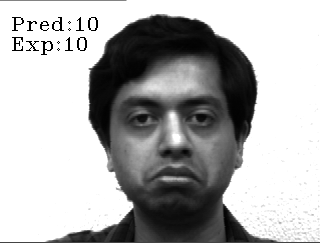

In [18]:
#create the prediction
prediction = lbph_face_classifier.predict(image_np)
prediction
print(prediction)
print(prediction[0])
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject',''))
print(expected_output)
cv2.putText(image_np,'Pred:'+str(prediction[0]),(10,30),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv2.putText(image_np,'Exp:'+str(prediction[0]),(10,50),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv2_imshow(image_np)

### Evaluting the face classifier

In [19]:
paths = [os.path.join('/content/yalefaces/test',f) for f in os.listdir('/content/yalefaces/test')]
predictions =[]
expected_outputs=[]
for path in paths:
    #print(path)
    image = Image.open(path).convert('L')
    image_np = np.array(image,'uint8')
    prediction,_ =lbph_face_classifier.predict(image_np)
    expected_output=int(os.path.split(path)[1].split('.')[0].replace('subject',''))
    predictions.append(prediction)
    expected_outputs.append(expected_output)


In [20]:
predictions=np.array(predictions)
expected_outputs=np.array(expected_outputs)
print(predictions,type(predictions))

[13  8  3  9 15 12 11  5 14 14  3  7  4  4 14  9 12  4  4 12  7  7  6 11
  5  4  4  1 10 13] <class 'numpy.ndarray'>


In [21]:
expected_outputs

array([13,  8,  3,  7, 15, 12, 11,  5,  6, 14,  3,  7,  2,  4, 14,  9, 12,
        4, 10,  2, 15,  9,  6, 11,  5,  1,  8,  1, 10, 13])

In [22]:
#accuracy score
#correctly prediction 66%
#low values this prediction works
from sklearn.metrics import accuracy_score
print(accuracy_score(expected_outputs,predictions))
print(len(predictions))

0.7
30


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_outputs,predictions)

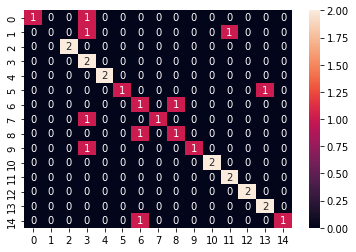

In [24]:
import seaborn 
seaborn.heatmap(cm,annot=True);

#### Detecting Facial points with Dlib

In [25]:
import dlib
import cv2
from google.colab.patches import cv2_imshow

### Detecting the facial points

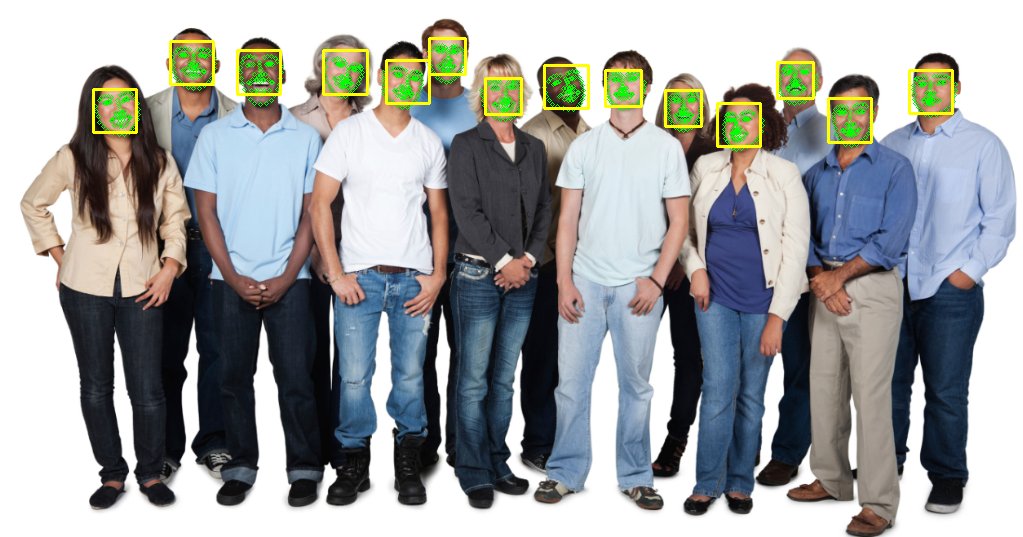

In [26]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor(img_path+'Weights/shape_predictor_68_face_landmarks.dat')
image = cv2.imread(img_path+'Images/people2.jpg')
face_detection = face_detector(image,1)
for face in face_detection:
    points = points_detector(image,face)
    for point in points.parts():
      cv2.circle(image,(point.x,point.y),2,(0,255,0),1)
    #print(points.parts())
    #print(len(points.parts()))
    l,t,r,b = face.left(),face.top(),face.right(),face.bottom()
    cv2.rectangle(image,(l,t),(r,b),(0,255,255),2)
cv2_imshow(image)

#### Detecting Facial descriptors

In [27]:
import os
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor(img_path+'Weights/shape_predictor_68_face_landmarks.dat')
face_descriptor_extractor = dlib.face_recognition_model_v1(img_path+'Weights/dlib_face_recognition_resnet_model_v1.dat')
index={}
idx=0
face_descriptors = None
paths = [os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
    image = Image.open(path).convert('RGB')
    image_np = np.array(image,'uint8')
    face_detection = face_detector(image_np,1)
    for face in face_detection:
        l,t,r,b = face.left(),face.top(),face.right(),face.bottom()
        cv2.rectangle(image_np,(l,t),(r,b),(0,0,255),2)
        points = points_detector(image_np, face)
    cv2_imshow(image_np)

Output hidden; open in https://colab.research.google.com to view.

In [28]:
import os
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor(img_path+'Weights/shape_predictor_68_face_landmarks.dat')
face_descriptor_extractor = dlib.face_recognition_model_v1(img_path+'Weights/dlib_face_recognition_resnet_model_v1.dat')
index={}
idx=0
face_descriptors = None
paths = [os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
    image = Image.open(path).convert('RGB')
    image_np = np.array(image,'uint8')
    face_detection = face_detector(image_np,1)
    for face in face_detection:
        l,t,r,b = face.left(),face.top(),face.right(),face.bottom()
        cv2.rectangle(image_np,(l,t),(r,b),(0,0,255),2)
        points = points_detector(image_np, face)
        for point in points.parts():
          cv2.circle(image_np,(point.x,point.y),2,(0,255,0),1)
        face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
        #print(face_descriptor,len(face_descriptor))
        face_descriptor =[f for f in face_descriptor]
        face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
        face_descriptor = face_descriptor[np.newaxis, :]
        #print(face_descriptor, face_descriptor.shape)
        if face_descriptors is None:
            face_descriptors=face_descriptor
        else:
            face_descriptors = np.concatenate((face_descriptors,face_descriptor),axis=0)
        index[idx]=path
        idx+=1
    cv2_imshow(image_np)

Output hidden; open in https://colab.research.google.com to view.

In [29]:
face_descriptors.shape

(132, 128)

In [30]:
face_descriptors

array([[-0.11659595,  0.07639781,  0.05167837, ..., -0.00875326,
         0.02409004,  0.04955691],
       [-0.02849522,  0.08739693,  0.0849838 , ..., -0.04455369,
         0.03700913,  0.02833332],
       [-0.15744105,  0.04295208, -0.00066937, ...,  0.03094248,
         0.07517749,  0.03862835],
       ...,
       [-0.14021032,  0.0755212 ,  0.01510923, ...,  0.01090847,
         0.06845599,  0.02865314],
       [-0.09147173,  0.0276349 ,  0.05126109, ...,  0.05354742,
         0.071317  ,  0.04232257],
       [-0.13219109,  0.1203025 , -0.03911947, ..., -0.0094323 ,
         0.11292586,  0.00169522]])

In [31]:
index

{0: '/content/yalefaces/train/subject06.rightlight.gif',
 1: '/content/yalefaces/train/subject12.centerlight.gif',
 2: '/content/yalefaces/train/subject02.sleepy.gif',
 3: '/content/yalefaces/train/subject15.noglasses.gif',
 4: '/content/yalefaces/train/subject15.happy.gif',
 5: '/content/yalefaces/train/subject14.centerlight.gif',
 6: '/content/yalefaces/train/subject09.surprised.gif',
 7: '/content/yalefaces/train/subject04.rightlight.gif',
 8: '/content/yalefaces/train/subject05.normal.gif',
 9: '/content/yalefaces/train/subject15.wink.gif',
 10: '/content/yalefaces/train/subject04.happy.gif',
 11: '/content/yalefaces/train/subject06.sad.gif',
 12: '/content/yalefaces/train/subject06.normal.gif',
 13: '/content/yalefaces/train/subject02.glasses.gif',
 14: '/content/yalefaces/train/subject03.normal.gif',
 15: '/content/yalefaces/train/subject13.glasses.gif',
 16: '/content/yalefaces/train/subject12.wink.gif',
 17: '/content/yalefaces/train/subject01.sleepy.gif',
 18: '/content/yalefa

#### calculating the distance between faces

In [32]:
#face_descriptors[131]
np.linalg.norm(face_descriptors[131]-face_descriptors[130])

0.6929499829141994

In [33]:
np.linalg.norm(face_descriptors[131]-face_descriptors[129])

0.6278255663656427

In [34]:
np.linalg.norm(face_descriptors[131]-face_descriptors[128])

0.7871016000598794

### Detecting faces with Dlib

In [35]:
np.linalg.norm(face_descriptors[131]-face_descriptors, axis=1)

array([0.70050143, 0.72163726, 0.6263595 , 0.68952335, 0.65223847,
       0.76313891, 0.62908729, 0.75159809, 0.72519105, 0.70858175,
       0.65688976, 0.60967701, 0.64144554, 0.65307308, 0.67856062,
       0.71636842, 0.69165483, 0.67893043, 0.71896277, 0.76125649,
       0.79743512, 0.44448817, 0.72983083, 0.62628021, 0.67532276,
       0.73561059, 0.74327002, 0.6701957 , 0.70284181, 0.77599315,
       0.7725987 , 0.69311146, 0.7216462 , 0.75632954, 0.77190448,
       0.7900615 , 0.79113746, 0.70789919, 0.74355724, 0.67856062,
       0.68684054, 0.69294998, 0.69763785, 0.76697366, 0.74185714,
       0.73901056, 0.69618902, 0.40749094, 0.75245394, 0.64968272,
       0.73994032, 0.41040997, 0.70260847, 0.65372986, 0.77011464,
       0.66519796, 0.65902639, 0.70591567, 0.75081249, 0.63029424,
       0.66174031, 0.68014368, 0.69794751, 0.71218901, 0.71632527,
       0.71643879, 0.38967372, 0.76363675, 0.61642203, 0.64950958,
       0.73885265, 0.7572373 , 0.62641588, 0.78117066, 0.73808

In [36]:
np.argmin(np.linalg.norm(face_descriptors[0]-face_descriptors[1:], axis=1))

111

In [37]:
np.linalg.norm(face_descriptors[0]-face_descriptors[1:], axis=1)

array([0.88286804, 0.7205077 , 0.75623683, 0.73471293, 0.48340563,
       0.79607538, 0.54417987, 0.8281612 , 0.77475388, 0.54543529,
       0.41546532, 0.40547185, 0.77741558, 0.73415777, 0.65232041,
       0.94558008, 0.79578613, 0.54640937, 0.64724904, 0.60125034,
       0.70382337, 0.66277686, 0.80490644, 0.75800951, 0.66694863,
       0.6736168 , 0.56573674, 0.68373922, 0.66486573, 0.64732801,
       0.82784984, 0.85100624, 0.46845895, 0.66192111, 0.46100465,
       0.68806461, 0.85166053, 0.69778259, 0.73415777, 0.63800414,
       0.65642955, 0.81794198, 0.65001147, 0.66054984, 0.88554713,
       0.87198081, 0.71185808, 0.65557303, 0.70460982, 0.67676345,
       0.75075833, 0.87884962, 0.52782821, 0.65927134, 0.71970387,
       0.47692795, 0.83290628, 0.66837107, 0.53931671, 0.44599972,
       0.83589019, 0.8320144 , 0.78032588, 0.64485573, 0.65257693,
       0.70635483, 0.56221629, 0.7672344 , 0.72867072, 0.70985596,
       0.69129351, 0.78346335, 0.68582114, 0.91229368, 0.82344

### Detecting faces with Dlib

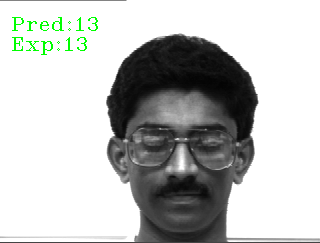

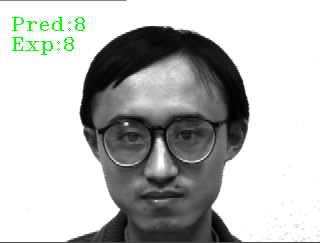

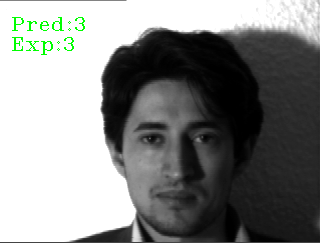

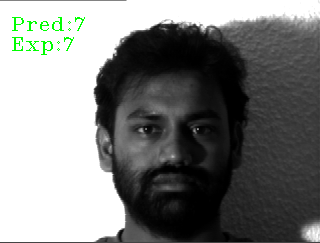

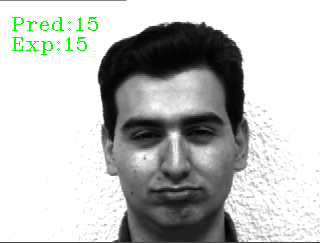

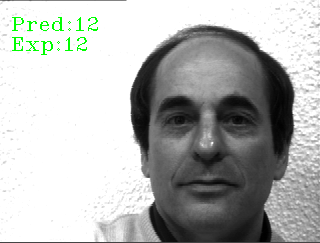

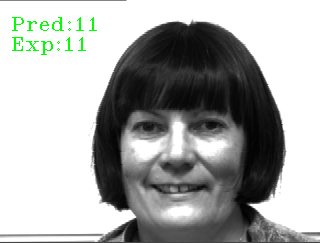

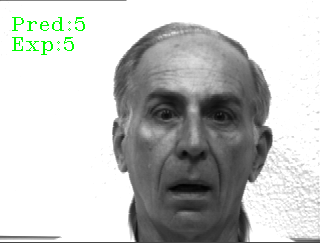

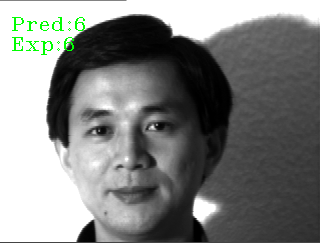

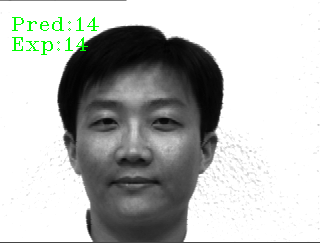

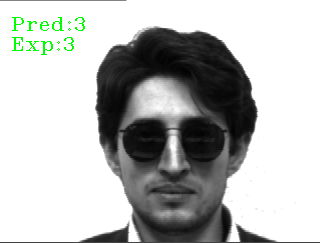

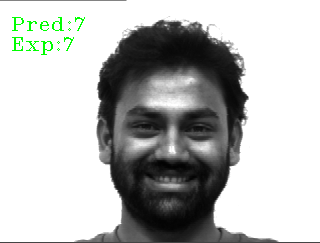

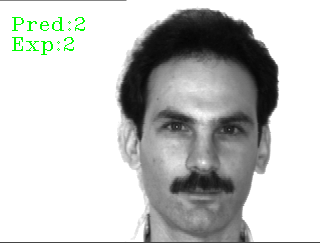

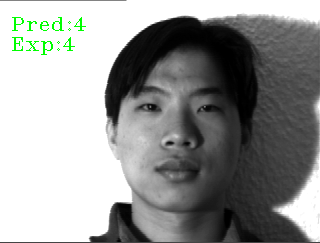

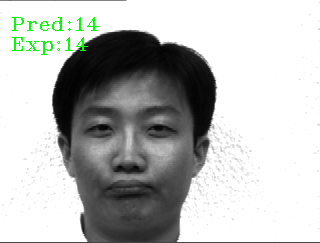

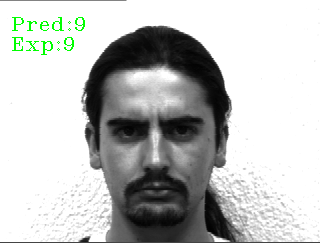

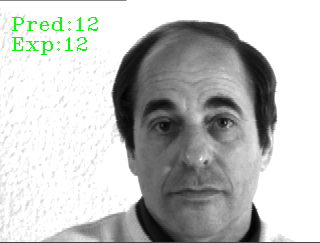

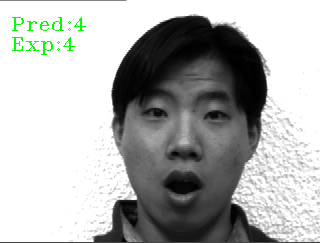

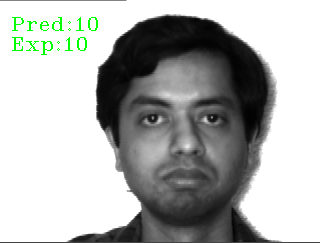

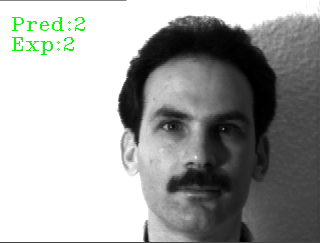

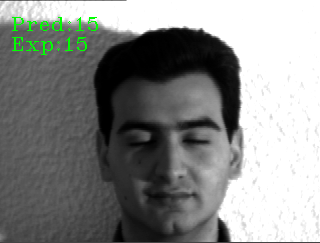

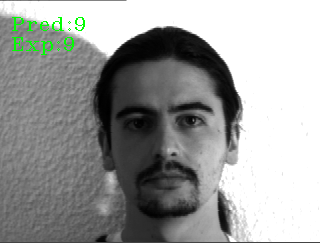

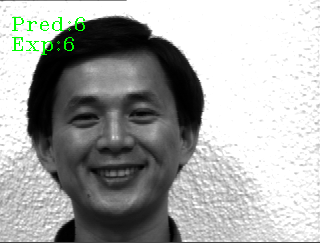

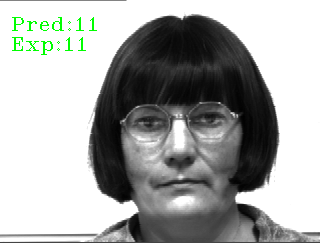

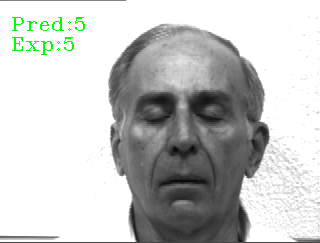

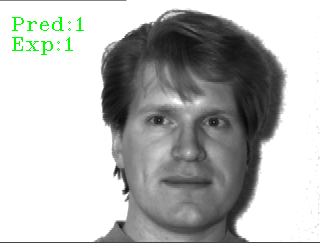

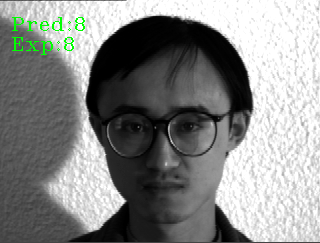

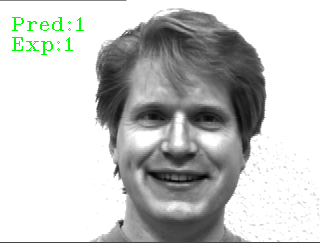

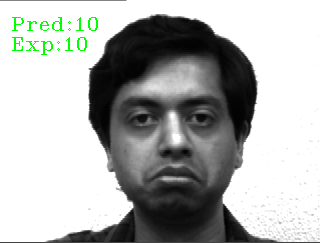

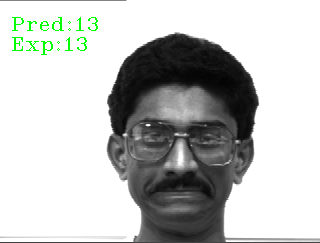

In [38]:
threshold=0.5
predictions=[]
expected_outputs=[]
paths = [os.path.join('/content/yalefaces/test',f) for f in os.listdir('/content/yalefaces/test')]
for path in paths:
    image = Image.open(path).convert('RGB')
    image_np = np.array(image, 'uint8')
    face_detection = face_detector(image_np,1)
    for face in face_detection:
        points = points_detector(image_np, face)
        face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np,points)
        face_descriptor =[f for f in face_descriptor]
        face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
        face_descriptor = face_descriptor[np.newaxis, :]
        distances = np.linalg.norm(face_descriptor - face_descriptors, axis=1)
        min_index = np.argmin(distances)
        min_distance = distances[min_index]
        if min_distance <= threshold:
           name_pred = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject',''))
        else:
            name_pred ='Not identified'
        #name_real = int(os.path.split(path)[1].split('.')[0].replace('subject',''))
        name_real = int(os.path.split(path)[1].split('.')[0].replace('subject',''))
        predictions.append(name_pred)
        expected_outputs.append(name_real)
        cv2.putText(image_np,'Pred:'+str(name_pred),(10,30),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
        cv2.putText(image_np,'Exp:'+str(name_real),(10,50),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
    cv2_imshow(image_np)
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

### Predictions and expected outputs

In [39]:
predictions

array([13,  8,  3,  7, 15, 12, 11,  5,  6, 14,  3,  7,  2,  4, 14,  9, 12,
        4, 10,  2, 15,  9,  6, 11,  5,  1,  8,  1, 10, 13])

In [40]:
expected_outputs

array([13,  8,  3,  7, 15, 12, 11,  5,  6, 14,  3,  7,  2,  4, 14,  9, 12,
        4, 10,  2, 15,  9,  6, 11,  5,  1,  8,  1, 10, 13])

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

1.0